<a href="https://colab.research.google.com/github/hufsaim/T03108701/blob/main/notebook_2025/Lab01_vis_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load Data and Create Subset

In [2]:
df = pd.read_excel('BME_MBTI_2025.xlsx')
print(df.shape)
df_ = df[::9]
df_

(57, 5)


,Name,EI,NS,TF,JP
0,Hyunbin,-0.44,0.36,0.42,-0.08
9,Minju,0.58,0.78,0.24,0.30
18,Jiyoon,0.88,-0.58,0.64,0.66
27,Yuna,0.76,0.68,-0.20,0.10
36,Doyeon,0.30,-0.28,-0.76,-0.32
45,Yujeong,0.60,0.20,-0.40,-0.20
54,Seoyeon,0.02,0.82,-0.78,-0.84


### 2D Vector Visualization (EI and TF)

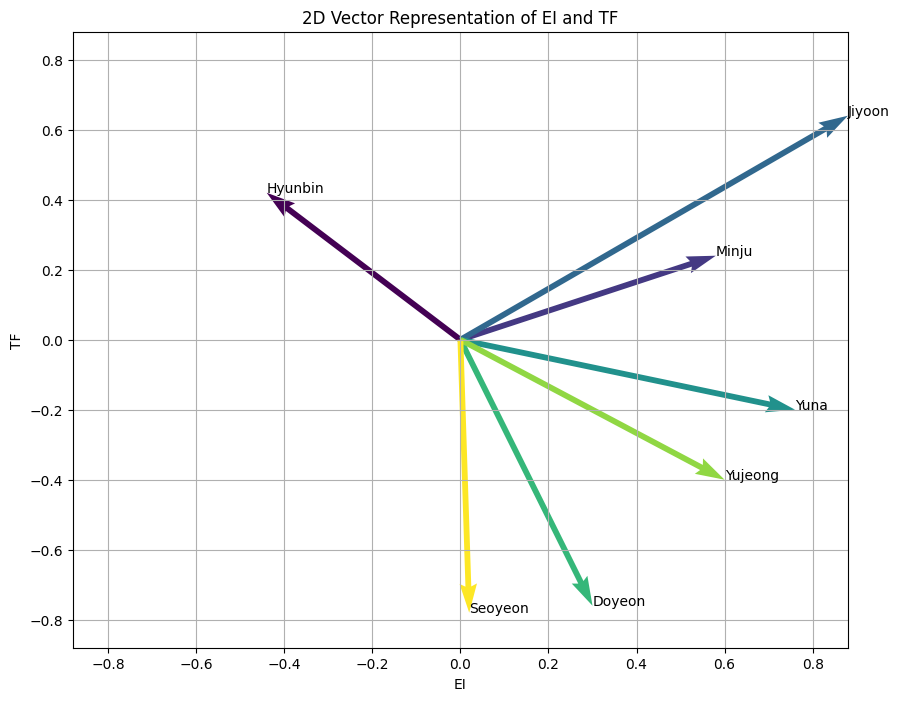

In [3]:
# Extract EI and TF data from df_
data_2d = df_[['EI', 'TF']].to_numpy()
names_2d = df_['Name'].tolist()

fig, ax = plt.subplots(figsize=(10, 8))

# Plotting vectors from origin (0,0)
origin_2d = np.zeros(data_2d.shape)

# Create a list of colors, one for each data point
colors = plt.cm.viridis(np.linspace(0, 1, len(data_2d)))

ax.quiver(origin_2d[:, 0], origin_2d[:, 1], data_2d[:, 0], data_2d[:, 1], color=colors, angles='xy', scale_units='xy', scale=1)

# Add names at the end of each arrow
for i, (x, y) in enumerate(data_2d):
    ax.text(x, y, names_2d[i])

# Set limits and labels
max_val_2d = np.max(np.abs(data_2d))
ax.set_xlim([-max_val_2d, max_val_2d])
ax.set_ylim([-max_val_2d, max_val_2d])
ax.set_xlabel('EI')
ax.set_ylabel('TF')
ax.set_title('2D Vector Representation of EI and TF')
ax.grid()
plt.show()

### Normalized 2D Vector Visualization (EI and TF)

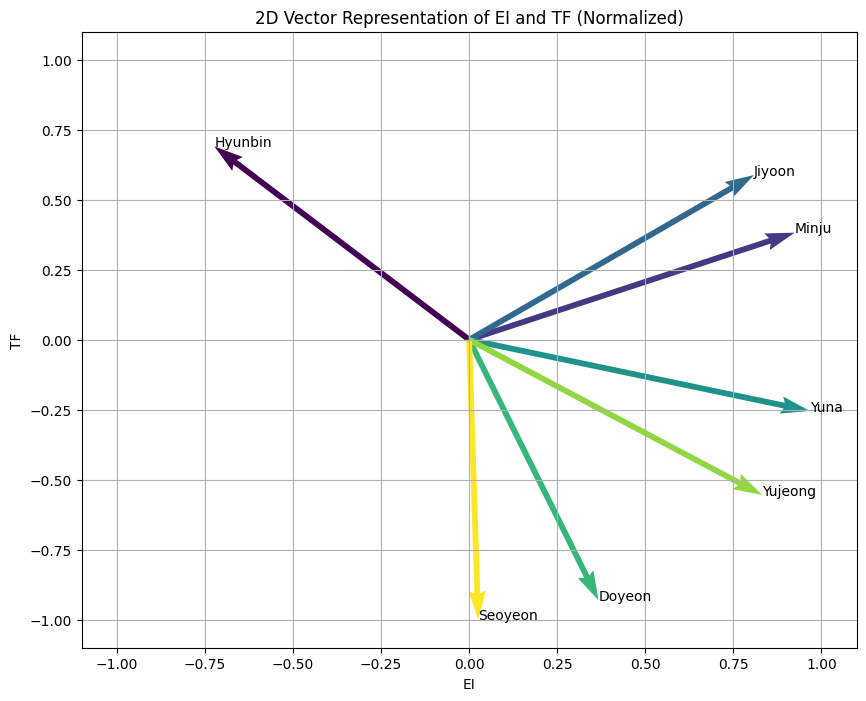

In [4]:
# Extract EI and TF data from df_
data_2d = df_[['EI', 'TF']].to_numpy()
names_2d = df_['Name'].tolist()

fig, ax = plt.subplots(figsize=(10, 8))

# Normalize the data to make all vectors have a length of 1
norms_2d = np.linalg.norm(data_2d, axis=1)
normalized_data_2d = data_2d / norms_2d[:, np.newaxis]

# Plotting vectors from origin (0,0)
origin_2d = np.zeros(normalized_data_2d.shape)

# Create a list of colors, one for each data point
colors = plt.cm.viridis(np.linspace(0, 1, len(normalized_data_2d)))

ax.quiver(origin_2d[:, 0], origin_2d[:, 1], normalized_data_2d[:, 0], normalized_data_2d[:, 1], color=colors, angles='xy', scale_units='xy', scale=1)

# Add names at the end of each arrow
for i, (x, y) in enumerate(normalized_data_2d):
    ax.text(x, y, names_2d[i])

# Set limits and labels
# Since vectors are normalized to length 1, the limits can be set to be slightly larger than 1
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_xlabel('EI')
ax.set_ylabel('TF')
ax.set_title('2D Vector Representation of EI and TF (Normalized)')
ax.grid()
plt.show()

### Extract 3D Subset Data

In [5]:
# Extract the data for EI, TF, and JP from the df_ dataframe
data_3d_subset = df_[['EI', 'TF', 'JP']].to_numpy()
names_3d_subset = df_['Name'].tolist()
print(data_3d_subset[:5])

[[-0.44  0.42 -0.08]
 [ 0.58  0.24  0.3 ]
 [ 0.88  0.64  0.66]
 [ 0.76 -0.2   0.1 ]
 [ 0.3  -0.76 -0.32]]


### 3D Vector Visualization (Subset Data)

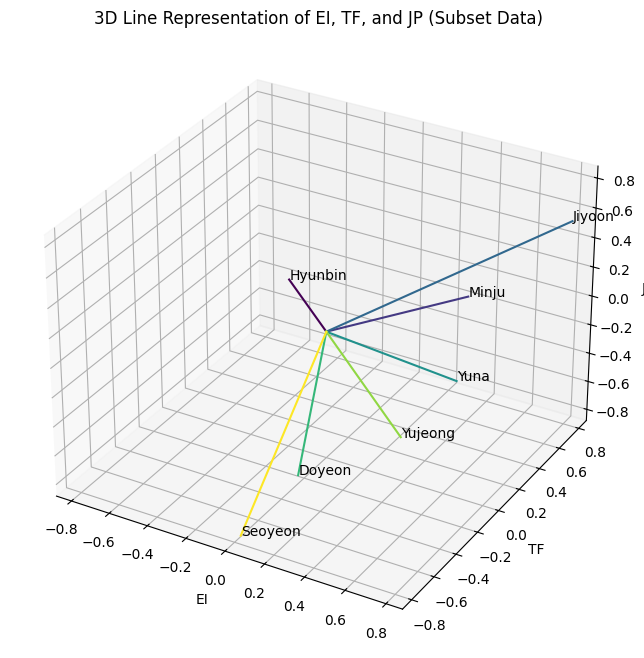

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting lines from origin (0,0,0)
origin_3d_subset = np.zeros(data_3d_subset.shape)

# Create a list of colors, one for each data point
colors_3d_subset = plt.cm.viridis(np.linspace(0, 1, len(data_3d_subset)))

# Plotting lines
for i in range(len(data_3d_subset)):
    ax.plot([origin_3d_subset[i, 0], data_3d_subset[i, 0]],
            [origin_3d_subset[i, 1], data_3d_subset[i, 1]],
            [origin_3d_subset[i, 2], data_3d_subset[i, 2]],
            color=colors_3d_subset[i])

# Set labels
ax.set_xlabel('EI')
ax.set_ylabel('TF')
ax.set_zlabel('JP')

ax.set_title('3D Line Representation of EI, TF, and JP (Subset Data)')

# Setting limits to see the lines clearly
max_val_3d_subset = np.max(np.abs(data_3d_subset))
ax.set_xlim([-max_val_3d_subset, max_val_3d_subset])
ax.set_ylim([-max_val_3d_subset, max_val_3d_subset])
ax.set_zlim([-max_val_3d_subset, max_val_3d_subset])

# Add text labels at the end of each line
for i in range(len(data_3d_subset)):
    ax.text(data_3d_subset[i, 0], data_3d_subset[i, 1], data_3d_subset[i, 2], names_3d_subset[i])

plt.show()

### Normalized 3D Vector Visualization (Subset Data)

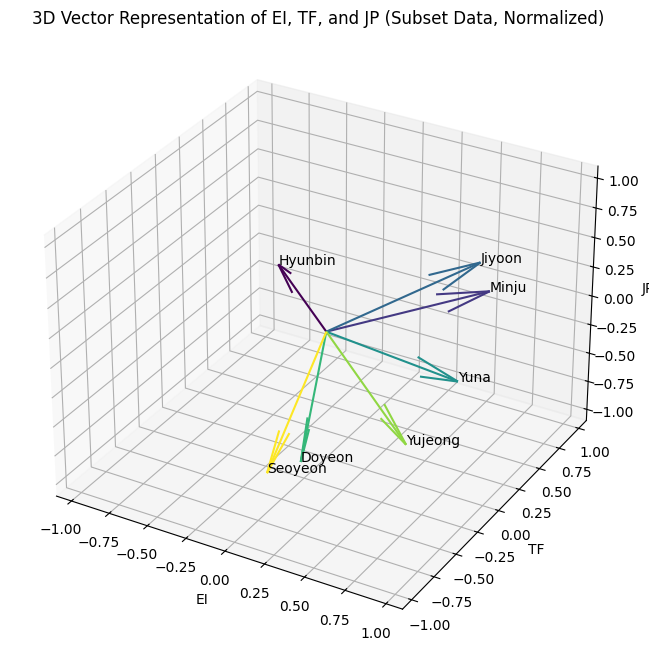

In [7]:
# Extract the data for EI, TF, and JP from the df_ dataframe
data_3d_subset = df_[['EI', 'TF', 'JP']].to_numpy()
names_3d_subset = df_['Name'].tolist()

# Normalize the data to make all vectors have a length of 1
norms_3d_subset = np.linalg.norm(data_3d_subset, axis=1)
normalized_data_3d_subset = data_3d_subset / norms_3d_subset[:, np.newaxis]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting vectors from origin (0,0,0)
origin_3d_subset = np.zeros(normalized_data_3d_subset.shape)

# Create a list of colors, one for each data point
colors_3d_subset = plt.cm.viridis(np.linspace(0, 1, len(normalized_data_3d_subset)))

ax.quiver(origin_3d_subset[:, 0], origin_3d_subset[:, 1], origin_3d_subset[:, 2], normalized_data_3d_subset[:, 0], normalized_data_3d_subset[:, 1], normalized_data_3d_subset[:, 2], color=colors_3d_subset, length=1, normalize=False)

# Set labels
ax.set_xlabel('EI')
ax.set_ylabel('TF')
ax.set_zlabel('JP')

ax.set_title('3D Vector Representation of EI, TF, and JP (Subset Data, Normalized)')

# Setting limits to see the vectors clearly
# Since vectors are normalized to length 1, the limits can be set to be slightly larger than 1
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])

# Add text labels at the end of each arrow
for i in range(len(normalized_data_3d_subset)):
    ax.text(normalized_data_3d_subset[i, 0], normalized_data_3d_subset[i, 1], normalized_data_3d_subset[i, 2], names_3d_subset[i])

plt.show()

### Display Subset 3D Data

In [8]:
print(data_3d_subset)

[[-0.44  0.42 -0.08]
 [ 0.58  0.24  0.3 ]
 [ 0.88  0.64  0.66]
 [ 0.76 -0.2   0.1 ]
 [ 0.3  -0.76 -0.32]
 [ 0.6  -0.4  -0.2 ]
 [ 0.02 -0.78 -0.84]]


### Display Normalized Subset 3D Data

In [9]:
print(normalized_data_3d_subset)

[[-0.7171795   0.68458043 -0.13039627]
 [ 0.83369138  0.34497574  0.43121968]
 [ 0.69147867  0.50289358  0.518609  ]
 [ 0.95933905 -0.25245765  0.12622882]
 [ 0.34188173 -0.86610038 -0.36467384]
 [ 0.80178373 -0.53452248 -0.26726124]
 [ 0.01744481 -0.68034755 -0.73268198]]


### Display Subset Names

In [10]:
print(names_3d_subset)

['Hyunbin', 'Minju', 'Jiyoon', 'Yuna', 'Doyeon', 'Yujeong', 'Seoyeon']


### Calculate Dot Products (3D Subset Data)


In [18]:
ref = 1
for i in range(len(data_3d_subset)):
    dp_val = np.dot(data_3d_subset[ref], data_3d_subset[i])
    print(f'dot product of {names_3d_subset[ref]} and {names_3d_subset[i]} = {round(dp_val, 2)}')

dot product of Minju and Hyunbin = -0.18
dot product of Minju and Minju = 0.48
dot product of Minju and Jiyoon = 0.86
dot product of Minju and Yuna = 0.42
dot product of Minju and Doyeon = -0.1
dot product of Minju and Yujeong = 0.19
dot product of Minju and Seoyeon = -0.43


### Calculate Dot Products (Normalized 3D Subset Data)

In [19]:
ref = 1
for i in range(len(normalized_data_3d_subset)):
    dp_val = np.dot(normalized_data_3d_subset[ref], normalized_data_3d_subset[i])
    print(f'dot product of {names_3d_subset[ref]} and {names_3d_subset[i]} = {round(dp_val, 2)}')

dot product of Minju and Hyunbin = -0.42
dot product of Minju and Minju = 1.0
dot product of Minju and Jiyoon = 0.97
dot product of Minju and Yuna = 0.77
dot product of Minju and Doyeon = -0.17
dot product of Minju and Yujeong = 0.37
dot product of Minju and Seoyeon = -0.54


### Extract Full 4D Data and Normalize

In [13]:
# Extract the data for EI, NS, TF, and JP from the df_ dataframe
data_4d_subset = df_[['EI', 'NS','TF', 'JP']].to_numpy()
names_4d_subset = df_['Name'].tolist()

# Normalize the data to make all vectors have a length of 1
norms_4d_subset = np.linalg.norm(data_4d_subset, axis=1)
normalized_data_4d_subset = data_4d_subset / norms_4d_subset[:, np.newaxis]


### Calculate Dot Products (Full 4D Subset Data)



In [16]:
ref = 1
for i in range(len(data_4d_subset)):
    dp_val = np.dot(data_4d_subset[ref], data_4d_subset[i])
    print(f'dot product of {names_4d_subset[ref]} and {names_4d_subset[i]} = {round(dp_val, 2)}')

dot product of Minju and Hyunbin = 0.1
dot product of Minju and Minju = 1.09
dot product of Minju and Jiyoon = 0.41
dot product of Minju and Yuna = 0.95
dot product of Minju and Doyeon = -0.32
dot product of Minju and Yujeong = 0.35
dot product of Minju and Seoyeon = 0.21


### Calculate Dot Products (Normalized 4D Subset Data)

In [17]:
ref = 1
for i in range(len(normalized_data_4d_subset)):
    dp_val = np.dot(normalized_data_4d_subset[ref], normalized_data_4d_subset[i])
    print(f'dot product of {names_4d_subset[ref]} and {names_4d_subset[i]} = {round(dp_val, 2)}')

dot product of Minju and Hyunbin = 0.14
dot product of Minju and Minju = 1.0
dot product of Minju and Jiyoon = 0.28
dot product of Minju and Yuna = 0.87
dot product of Minju and Doyeon = -0.34
dot product of Minju and Yujeong = 0.43
dot product of Minju and Seoyeon = 0.14


## Exercise
- 본인과의 dot product의 절대값이 가장 높은 학생은 누구인가?
- 본인과의 dot product의 절대값이 가장 낮은 학생은 누구인가?
- Normalization 후, 본인과의 dot product의 절대값이 가장 높은 학생은 누구인가?
- Normalization 후, 본인과의 dot product의 절대값이 가장 낮은 학생은 누구인가?
- 본인, 본인과의 dot product의 절대값이 가장 높은 학생, 본인과의 dot product의 절대값이 가장 낮은 학생의 vector를 시각화를 해보자 (5개의 차원 중 관심있는 2개 또는 3개의 차원을 선택하여 시각화).
- 모든 학생들의 vector를 본인이 가장 관심있는 2개의 차원에 대해 시각화를 해보자.